In [13]:
#importing librarries and data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/final_data.csv")




In [14]:
# FEATURE ENGINEERING
# New derived features
df["Rainfall_Temp_Interaction"] = df["Avg_rainfall"] * df["Avg_Temp"]
df["Pesticide_Efficiency"] = df["Pesticides(tonnes)"] / (df["Avg_Temp"] + 1)
df["Rainfall_Deviation"] = df["Avg_rainfall"] - df["Avg_rainfall"].mean()
df["Year_Since_Start"] = df["Year"] - df["Year"].min()


In [15]:
#FEATURE SELECTION 
# Convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Detect categorical columns automatically
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Encode them
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [16]:
#SPLITING THE FEATURES AND TARGET

X = df_encoded.drop("Crop_Yield(hectares)", axis=1)
y = df_encoded["Crop_Yield(hectares)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
#MODEL TRAINING
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
#MAKING PREDICTIONS
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [19]:
#EVALUATE MODELS
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} → R²: {r2:.3f}, RMSE: {rmse:.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression → R²: 0.051, RMSE: 0.001
Random Forest → R²: 0.985, RMSE: 0.000


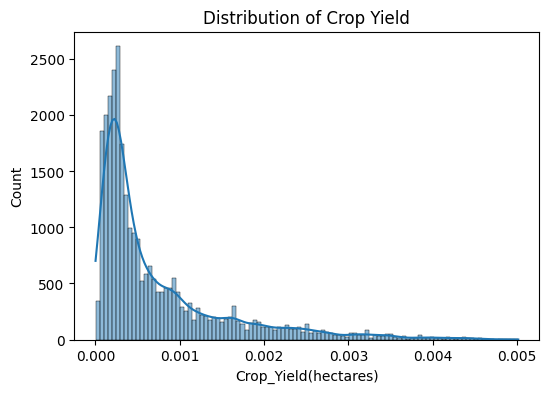

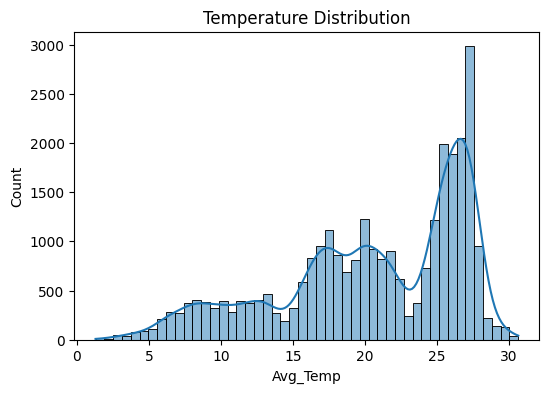

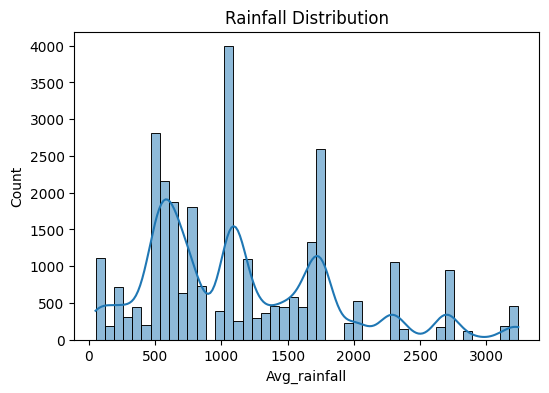

In [20]:
#univariate analysis for the specific columns.
plt.figure(figsize=(6,4)) 
sns.histplot(df['Crop_Yield(hectares)'], kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Temp'], kde=True)
plt.title("Temperature Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Avg_rainfall'], kde=True)
plt.title("Rainfall Distribution")
plt.show()


<Axes: xlabel='Avg_rainfall', ylabel='Crop_Yield(hectares)'>

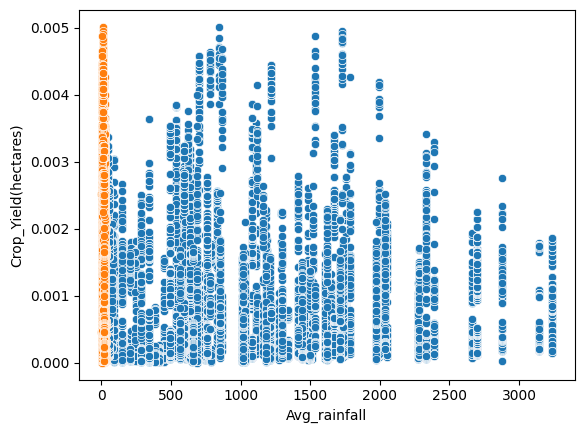

In [21]:
#bivariate analysis for the specific columns. here we are checking relationship of rainfall and temp with crop yield
sns.scatterplot(data=df, x='Avg_rainfall', y='Crop_Yield(hectares)')
sns.scatterplot(data=df, x='Avg_Temp', y='Crop_Yield(hectares)')

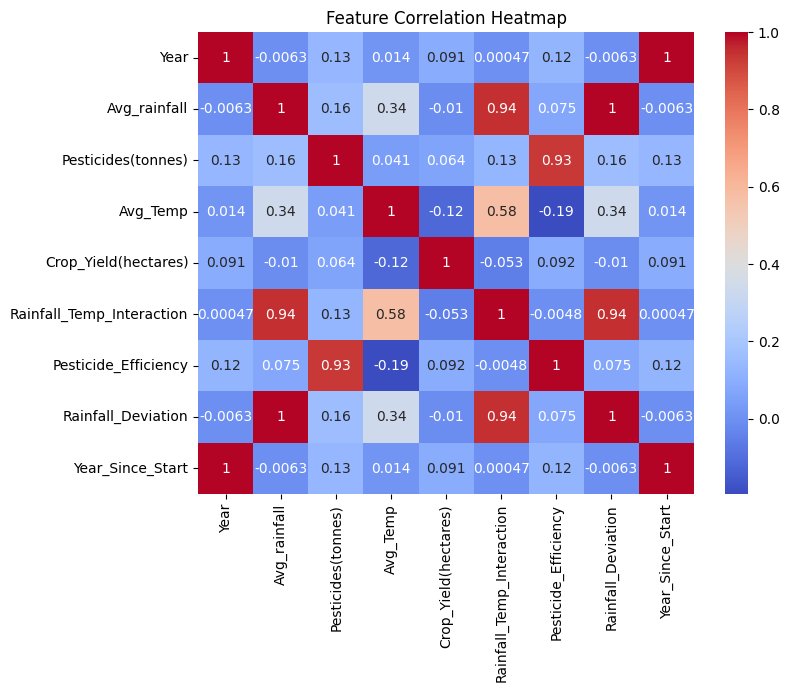

In [22]:
#figuring out the correlationbw some temp and crop yield.
plt.figure(figsize=(8,6)) 
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


<Axes: xlabel='Year', ylabel='Avg_rainfall'>

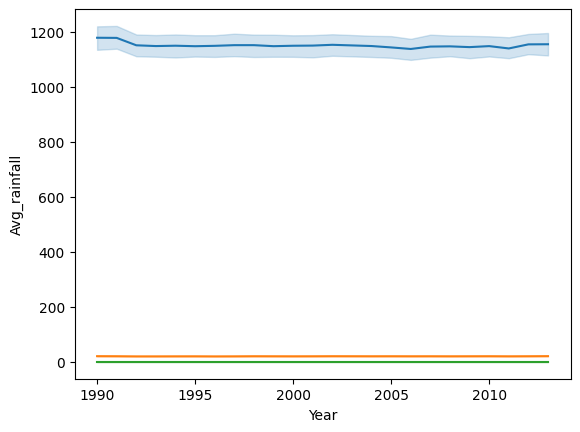

In [23]:
sns.lineplot(data=df, x='Year', y='Avg_rainfall')
sns.lineplot(data=df, x='Year', y='Avg_Temp')
sns.lineplot(data=df, x='Year', y='Crop_Yield(hectares)')

In [24]:
df.groupby('Area')['Crop_Yield(hectares)'].mean().sort_values(ascending=False).head(10)


Area
United Kingdom    0.002410
Belgium           0.002165
Denmark           0.002140
Netherlands       0.002042
Ireland           0.001979
New Zealand       0.001919
Sweden            0.001874
Bahrain           0.001532
Norway            0.001461
Switzerland       0.001450
Name: Crop_Yield(hectares), dtype: float64

In [25]:
summary = df.groupby('Item')[['Avg_Temp', 'Avg_rainfall', 'Crop_Yield(hectares)']].mean()
summary.to_csv("../data/summary_stats.csv")


In [26]:
import joblib
joblib.dump(rf_model, "../models/trained_model_v2.joblib")
print("Train R²:", rf_model.score(X_train, y_train))
print("Test R²:", rf_model.score(X_test, y_test))


Train R²: 0.9976424238536402
Test R²: 0.9845649822106052
